### Data Processing

In [1]:
import pandas as pd

#Change cities: Panama_city, Panama_city_beach, Lynn_haven, Tallahassee
city = 'Panama_city'
tract_POI = []

#Data input
data = pd.read_excel(city + '_2018_10.xlsx','Sheet1')[['category','visitor_home_aggregation']]

#category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]
category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]

for item in category:
    df = data[data['category'].isin(item)].reset_index()
    
    #Visitors home aggregation dictionary
    dic = {}
    for i in range(df.shape[0]):
        dic_tmp = eval(df['visitor_home_aggregation'][i])
        for key in dic_tmp:
            if key in dic.keys():
                dic[key] += dic_tmp[key]
            else:
                dic[key] = dic_tmp[key]
    dic = dict(sorted(dic.items(), key = lambda x: x[1], reverse = True))
    dic = {key:value for key,value in dic.items() if value > 9}
    
    #Dataframe of tract-visitors-POI
    pf = pd.DataFrame({'tract': list(dic.keys()), 'visitors': list(dic.values())})
    pf['POI'] = 'S' + str(item[0])
    tract_POI.append(pf)

#Data output
pd.concat(tract_POI).to_csv(city + '_tract_POI.csv', index=False)

### Tract-POI Network

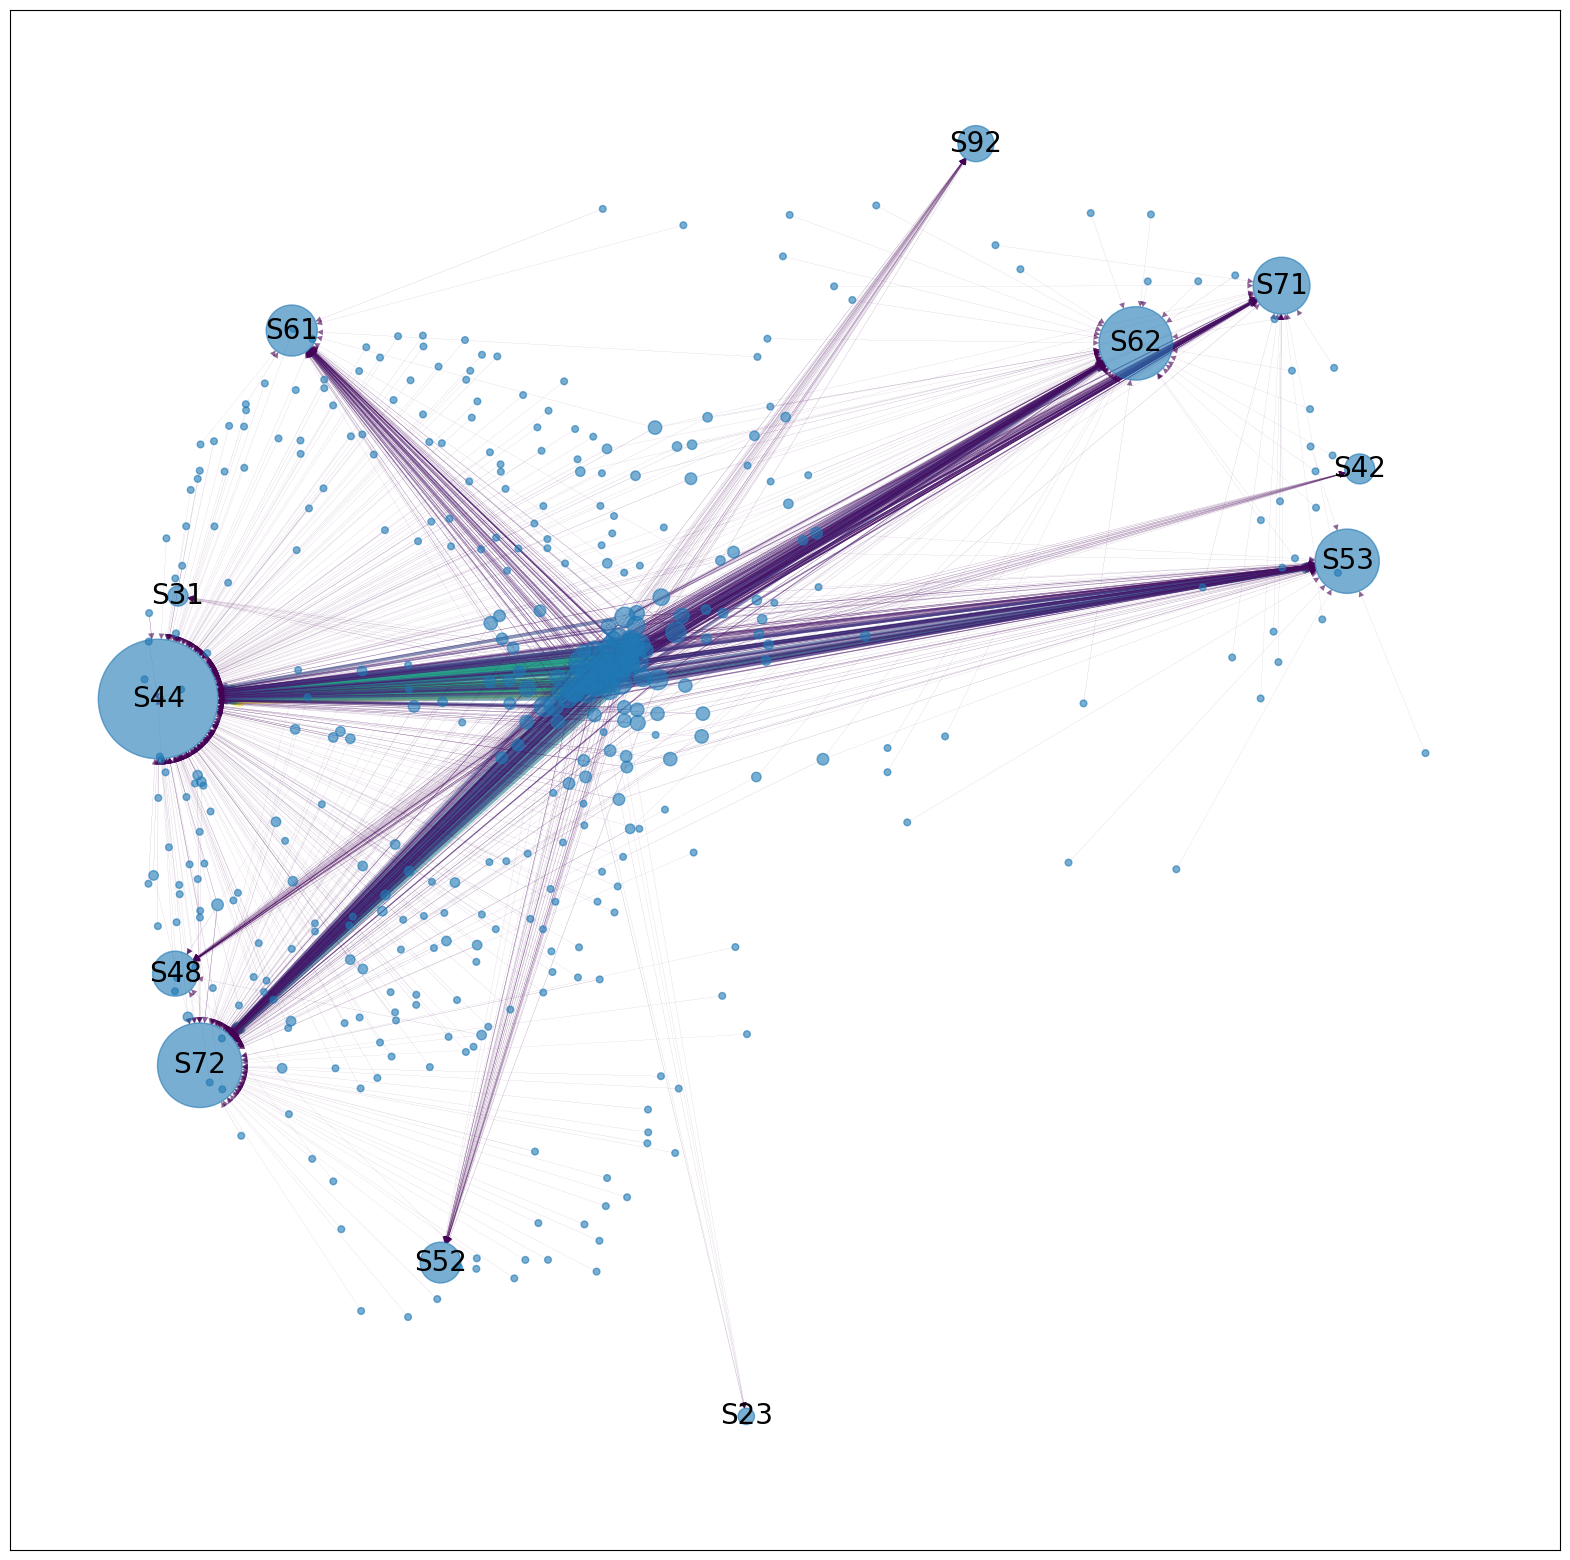

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#Change cities: Panama_city, Panama_city_beach, Lynn_haven, Tallahassee
city = 'Panama_city'

#Normalization of edge weights
df = pd.read_csv(city + '_tract_POI.csv')
df['weight'] = df[['visitors']].apply(lambda x: x / max(x))

#Tract-POI network
tract_poi = nx.from_pandas_edgelist(df, 'tract', 'POI', ['visitors','weight'], create_using=nx.DiGraph())

#Degree centrality
degree = nx.degree_centrality(tract_poi)

#Visualization
pos = nx.spring_layout(tract_poi)
node_size =  [10000*i for i in degree.values()]
edge_weight = nx.get_edge_attributes(tract_poi, 'weight')
edge_width = [10*i for i in edge_weight.values()]
edge_attribute = nx.get_edge_attributes(tract_poi, 'visitors')
edge_color = [i for i in edge_attribute.values()]

plt.figure(figsize = (20,20))
nx.draw_networkx(tract_poi, pos, with_labels=False, node_size=node_size, width=edge_width, edge_color=edge_color, alpha=0.5)

node_labels = {node:node for node in tract_poi.nodes() if node[0] == 'S'}
nx.draw_networkx_labels(tract_poi, pos, labels=node_labels, font_size=20)

plt.show()